# Online Shopping Analysis – EDA & Pre‑processing in Python

This notebook performs an end‑to‑end exploratory data analysis (EDA) and basic
pre‑processing workflow on the **Online Shoppers Purchasing Intention** dataset
(from Kaggle).

We will cover:

1. Importing Python libraries  
2. Reading the data  
3. Statistical analysis  
4. Handling missing values  
5. Handling duplicates  
6. Handling outliers  
7. Visual analysis (5–10 charts)  
8. Checking skewness and kurtosis  
9. Label Encoding & One‑Hot Encoding  
10. Feature selection with `SelectKBest`  
11. Scaling  
12. Train–test split

## 1. Import Python Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Plot settings
plt.style.use("default")
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

## 2. Read the Data

In [3]:
# Adjust the path to where Kaggle stores the input in your environment.

data_path = "online_shoppers_intention.csv"



In [4]:
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [5]:
print("Shape of raw data:", df.shape)

Shape of raw data: (52955, 21)


## 3. Statistical Analysis

In [6]:
# Basic information
print("Data types & non‑null counts:")
display(df.info())

Data types & non‑null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date  

None

In [7]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics (numerical):")
display(df.describe())


Descriptive statistics (numerical):


,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [8]:
# Descriptive statistics for object / categorical columns
print("\nDescriptive statistics (categorical):")
display(df.describe(include="object"))


Descriptive statistics (categorical):


,Gender,Location,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status,Date,Coupon_Code
count,52924,52924,52924,52924,52924,52955,52924,52924,52555
unique,2,5,365,1145,404,21,3,365,48
top,F,Chicago,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,11/27/2019,SALE20
freq,33007,18380,335,3511,3511,18126,26926,335,6373


In [9]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [10]:
# Adding New Columns:
df['Total Prices'] = df['Avg_Price'] * df['Quantity'] + df['Delivery_Charges']
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']


In [11]:
df.columns 

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct', 'Total Prices',
       'Total_Spend'],
      dtype='object')

In [12]:
# Target variable distribution (Revenue)
print("\nTarget (Revenue) distribution:")
print(df['Total_Spend'].value_counts(normalize=True) * 100)


Target (Revenue) distribution:
Total_Spend
5819.58    0.632983
4989.36    0.587635
5192.80    0.563072
3655.96    0.551735
2485.28    0.549845
             ...   
5486.46    0.077470
1993.69    0.073691
7749.46    0.066133
3980.23    0.060464
3432.64    0.051017
Name: proportion, Length: 365, dtype: float64


In [13]:
# Correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct,Total Prices,Total_Spend
Unnamed: 0,1.000000,-0.032982,-0.013787,0.043079,0.009366,-0.089781,-0.009051,0.040725,-0.209807,-0.101547,0.058658,-0.433815,-0.036769,-0.195070
CustomerID,-0.032982,1.000000,-0.024431,-0.091476,-0.008174,0.003685,-0.006316,0.000468,-0.004611,-0.017872,-0.090332,0.000337,-0.013738,-0.013132
Tenure_Months,-0.013787,-0.024431,1.000000,0.022163,0.006867,-0.000785,-0.014848,-0.001239,0.040070,0.025865,0.019378,0.029703,0.006056,0.040916
Transaction_ID,0.043079,-0.091476,0.022163,1.000000,-0.028456,0.126397,-0.085840,-0.098705,0.199053,0.165261,0.995517,0.241759,0.030465,0.224047
Quantity,0.009366,-0.008174,0.006867,-0.028456,1.000000,-0.113996,0.191383,-0.027921,-0.004768,0.010741,-0.027278,-0.011381,0.509349,0.002946
Avg_Price,-0.089781,0.003685,-0.000785,0.126397,-0.113996,1.000000,-0.107799,-0.575393,0.094225,0.061082,0.120215,0.027688,0.423412,0.096359
Delivery_Charges,-0.009051,-0.006316,-0.014848,-0.085840,0.191383,-0.107799,1.000000,0.028240,-0.013329,-0.019512,-0.086253,-0.018870,0.183280,-0.019779
GST,0.040725,0.000468,-0.001239,-0.098705,-0.027921,-0.575393,0.028240,1.000000,-0.072826,-0.046661,-0.093893,-0.012852,-0.312604,-0.074165
Offline_Spend,-0.209807,-0.004611,0.040070,0.199053,-0.004768,0.094225,-0.013329,-0.072826,1.000000,0.336625,0.200280,0.051719,0.039733,0.846410
Online_Spend,-0.101547,-0.017872,0.025865,0.165261,0.010741,0.061082,-0.019512,-0.046661,0.336625,1.000000,0.165525,0.024343,0.033757,0.786376


## 4. Handling Missing Values

In [14]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing)

# Simple handling strategy:
# - For numerical columns: fill with median
# - For categorical columns: fill with mode

Missing values per column:


Coupon_Code            400
Discount_pct           400
CustomerID              31
Transaction_ID          31
Tenure_Months           31
Gender                  31
Location                31
Total Prices            31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Coupon_Status           31
Delivery_Charges        31
Quantity                31
Avg_Price               31
Total_Spend             31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Unnamed: 0               0
Product_Category         0
Month                    0
dtype: int64

In [15]:
df_clean = df.copy()

num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

In [16]:
for col in num_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

In [17]:
for col in cat_cols:
    mode_val = df_clean[col].mode().iloc[0]
    df_clean[col] = df_clean[col].fillna(mode_val)

In [18]:
print("\nAny missing values left?:", df_clean.isnull().sum().any())


Any missing values left?: False


## 5. Handling Duplicates

In [19]:
# Count duplicate rows
dup_count = df_clean.duplicated().sum()
print("Number of duplicate rows:", dup_count)



Number of duplicate rows: 0


In [20]:
# Drop duplicates if any
if dup_count > 0:
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
    print("Shape after dropping duplicates:", df_clean.shape)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## 6. Handling Outliers (IQR Method)

In [21]:
# We'll use the IQR method for each numerical column.
# This cell will remove rows that contain outliers in ANY numerical column.

def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df_out.shape[0]
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        after = df_out.shape[0]
        print(f"{col}: removed {before - after} outliers")
    return df_out



In [22]:
df_no_outliers = remove_outliers_iqr(df_clean, num_cols)
print("Shape before outlier removal:", df_clean.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

Unnamed: 0: removed 0 outliers
CustomerID: removed 0 outliers
Tenure_Months: removed 0 outliers
Transaction_ID: removed 0 outliers
Quantity: removed 8284 outliers
Avg_Price: removed 499 outliers
Delivery_Charges: removed 6293 outliers
GST: removed 0 outliers
Offline_Spend: removed 1311 outliers
Online_Spend: removed 189 outliers
Month: removed 0 outliers
Discount_pct: removed 0 outliers
Total Prices: removed 1339 outliers
Total_Spend: removed 909 outliers
Shape before outlier removal: (52955, 23)
Shape after outlier removal: (34131, 23)


## 7. Visual Analysis (5–10 Charts)

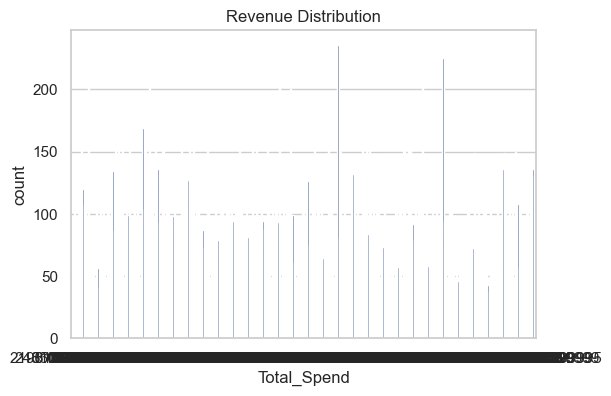

In [23]:
# For convenience, we will use df_no_outliers for visualisation
viz_df = df_no_outliers.copy()

# 1. Count plot of target variable (Revenue)
plt.figure(figsize=(6,4))
sns.countplot(x="Total_Spend", data=viz_df)
plt.title("Revenue Distribution")
plt.show()

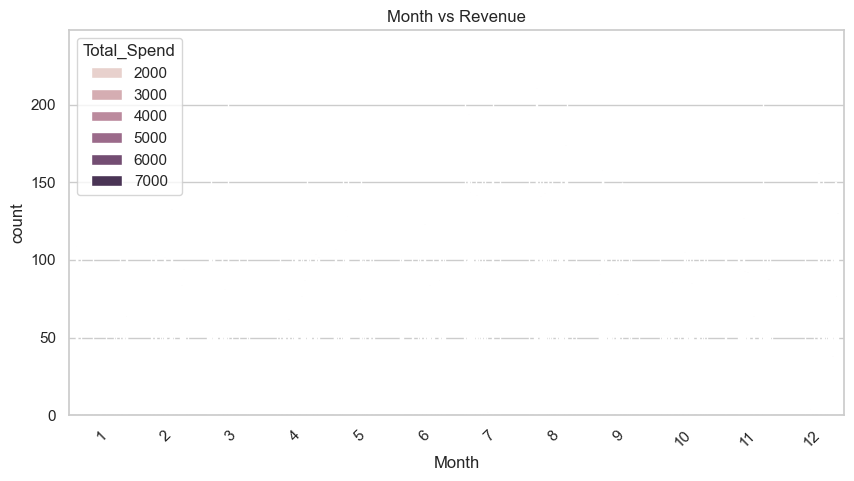

In [24]:
# 2. Count plot of Month vs Revenue
plt.figure(figsize=(10,5))
sns.countplot(x="Month", hue="Total_Spend", data=viz_df, order=sorted(viz_df["Month"].unique()))
plt.title("Month vs Revenue")
plt.xticks(rotation=45)
plt.show()

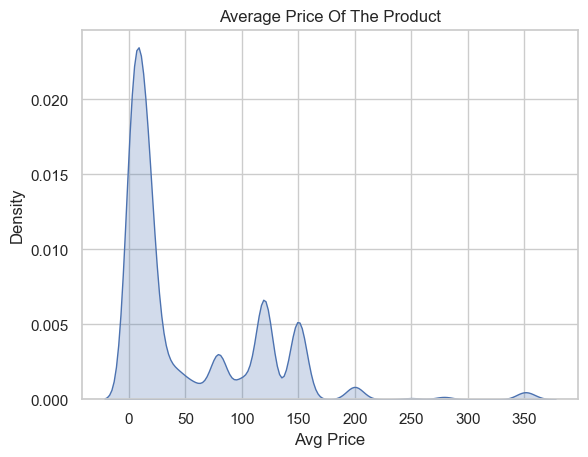

In [25]:
# 4. KDE plot: BounceRates vs ExitRates
sns.kdeplot(df['Avg_Price'],fill=True)
plt.title('Average Price Of The Product')
plt.xlabel('Avg Price')
plt.show()

<Axes: ylabel='Delivery_Charges'>

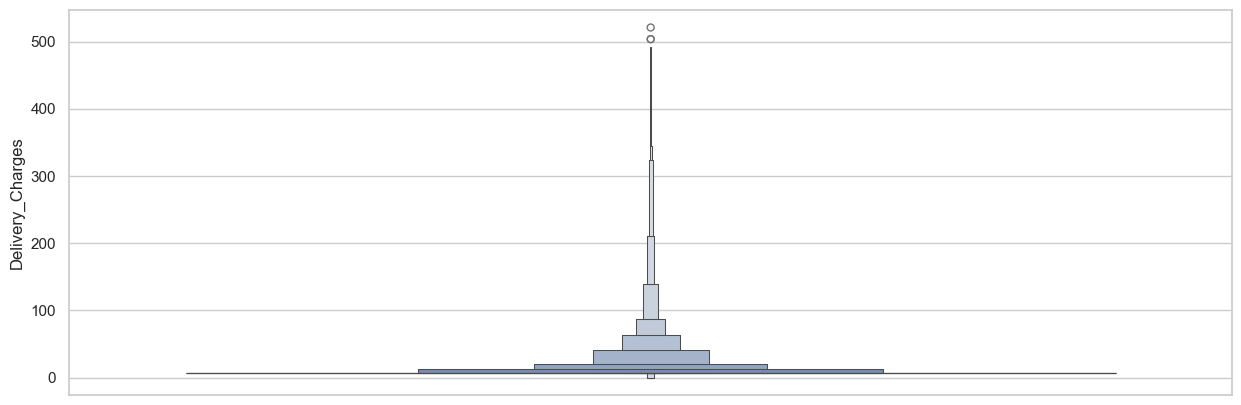

In [26]:
plt.figure(figsize=(15,5))
sns.boxenplot(df['Delivery_Charges'])


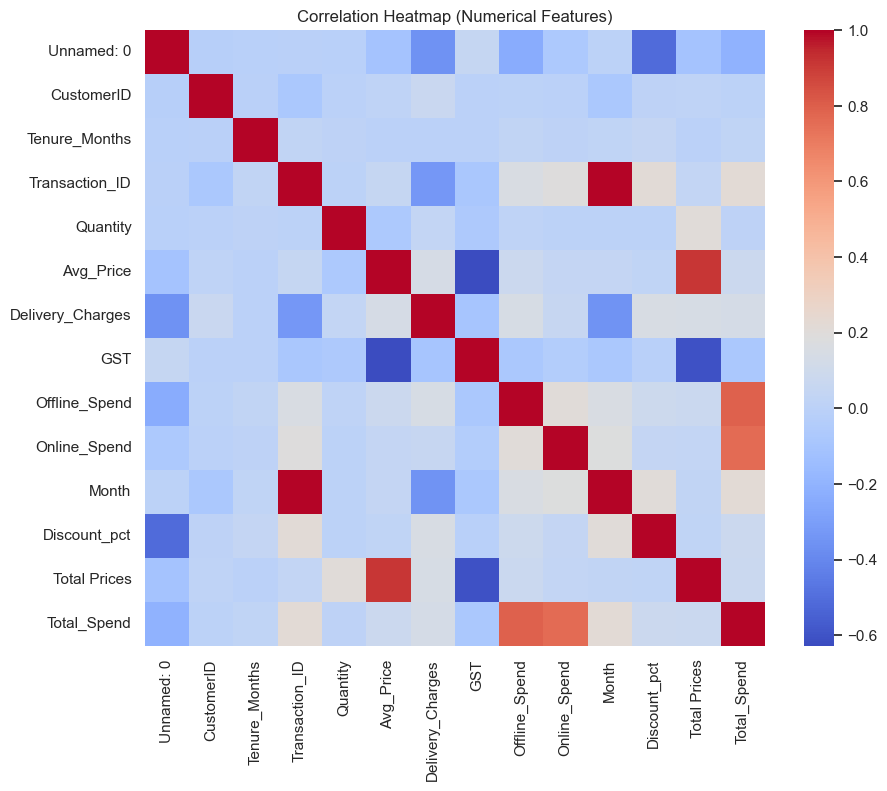

In [27]:
# 6. Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(viz_df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## 8. Checking Skewness and Kurtosis

In [28]:
skewness = viz_df[numeric_cols].skew()
kurtosis = viz_df[numeric_cols].kurtosis()

print("Skewness of numerical features:")
display(skewness)

print("\nKurtosis of numerical features:")
display(kurtosis)

Skewness of numerical features:


Unnamed: 0          0.013919
CustomerID         -0.034284
Tenure_Months      -0.068495
Transaction_ID     -0.040502
Quantity            2.363171
Avg_Price           0.943475
Delivery_Charges    0.658510
GST                -0.438502
Offline_Spend      -0.032117
Online_Spend        0.295042
Month              -0.121482
Discount_pct       -0.004967
Total Prices        1.131458
Total_Spend         0.130393
dtype: float64


Kurtosis of numerical features:


Unnamed: 0         -1.209399
CustomerID         -1.231404
Tenure_Months      -1.106753
Transaction_ID     -0.971557
Quantity            4.875188
Avg_Price          -0.244079
Delivery_Charges   -1.566398
GST                -1.351504
Offline_Spend       0.003460
Online_Spend       -0.443608
Month              -1.028910
Discount_pct       -1.477186
Total Prices        0.214290
Total_Spend        -0.078715
dtype: float64

## 9. Label Encoding & One‑Hot Encoding

In [29]:
df_enc = df_no_outliers.copy()

# Identify categorical columns
cat_cols_enc = df_enc.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical columns:", cat_cols_enc)

# Example: Label encode binary columns like 'Revenue' and 'Weekend'
label_enc_cols = []
for col in ["Revenue", "Weekend"]:
    if col in df_enc.columns:
        label_enc_cols.append(col)

le = LabelEncoder()
for col in label_enc_cols:
    df_enc[col] = le.fit_transform(df_enc[col])
    print(f"Label encoded column: {col}")

# Example: One‑hot encode 'Month' and 'VisitorType' (if present)
onehot_cols = [c for c in ["Month", "VisitorType"] if c in df_enc.columns]
df_enc = pd.get_dummies(df_enc, columns=onehot_cols, drop_first=True)

print("\nShape after encoding:", df_enc.shape)
df_enc.head()

Categorical columns: ['Gender', 'Location', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Coupon_Status', 'Date', 'Coupon_Code']

Shape after encoding: (34131, 33)


,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Coupon_Code,Discount_pct,Total Prices,Total_Spend,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,ELEC10,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,ELEC10,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,ELEC10,10.0,252.04,6924.5,False,False,False,False,False,False,False,False,False,False,False
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,ELEC10,10.0,88.00,6924.5,False,False,False,False,False,False,False,False,False,False,False
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,ELEC10,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False


## 10. Feature Selection with SelectKBest

In [30]:
# Assume 'Revenue' is the target
if "Total_Spend" not in df_enc.columns:
    raise ValueError("Revenue column not found after encoding – please check encoding step.")



In [32]:
#Label Encoding
# -----------------------------
label_cols = ['Gender', 'Coupon_Status', 'Product_SKU', 'Coupon_Code']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in label_cols:
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))

In [33]:
#One-Hot Encoding
# ---------------------------------
onehot_cols = ['Location', 'Product_Category']

df_enc = pd.get_dummies(df_enc, columns=onehot_cols, drop_first=True)

df_enc.head()

,Unnamed: 0,CustomerID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Coupon_Code,Discount_pct,Total Prices,Total_Spend,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Product_Category_Android,Product_Category_Apparel,Product_Category_Backpacks,Product_Category_Bags,Product_Category_Bottles,Product_Category_Drinkware,Product_Category_Fun,Product_Category_Gift Cards,Product_Category_Google,Product_Category_Headgear,Product_Category_Housewares,Product_Category_Lifestyle,Product_Category_More Bags,Product_Category_Nest,Product_Category_Nest-USA,Product_Category_Notebooks,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze
0,0,17850.0,1,12.0,16679.0,2019-01-01,943,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,6.5,2,0.1,1/1/2019,4500.0,2424.5,12,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,17850.0,1,12.0,16680.0,2019-01-01,943,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,6.5,2,0.1,1/1/2019,4500.0,2424.5,12,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,2,17850.0,1,12.0,16696.0,2019-01-01,944,Nest Cam Outdoor Security Camera - USA,2.0,122.77,6.5,1,0.1,1/1/2019,4500.0,2424.5,12,10.0,252.04,6924.5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,17850.0,1,12.0,16699.0,2019-01-01,945,Nest Protect Smoke + CO White Battery Alarm-USA,1.0,81.50,6.5,0,0.1,1/1/2019,4500.0,2424.5,12,10.0,88.00,6924.5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,4,17850.0,1,12.0,16700.0,2019-01-01,943,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,6.5,0,0.1,1/1/2019,4500.0,2424.5,12,10.0,160.21,6924.5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [41]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct', 'Total Prices',
       'Total_Spend'],
      dtype='object')

In [45]:
for col in df_enc.columns:
    if 'date' in col.lower():
        df_enc[col] = pd.to_datetime(df_enc[col], errors='coerce')

        df_enc[col+'_Year'] = df_enc[col].dt.year
        df_enc[col+'_Month'] = df_enc[col].dt.month
        df_enc[col+'_Day'] = df_enc[col].dt.day
        df_enc[col+'_DOW'] = df_enc[col].dt.dayofweek

        df_enc = df_enc.drop(col, axis=1)



In [56]:
X = df_enc.drop("Total_Spend", axis=1)
y = df_enc["Total_Spend"]



In [54]:
df_enc = df_enc.drop(["Product_Description", "Product_SKU"], axis=1)


In [57]:
# Use ANOVA F‑test for classification
k = 10  # desired number of best features
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)



C:\Users\alhaf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [49] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\alhaf\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [58]:
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print(f"Top {len(selected_features)} selected features:")
for feat in selected_features:
    print("-", feat)

Top 53 selected features:
- Unnamed: 0
- CustomerID
- Gender
- Tenure_Months
- Transaction_ID
- Quantity
- Avg_Price
- Delivery_Charges
- Coupon_Status
- GST
- Offline_Spend
- Online_Spend
- Coupon_Code
- Discount_pct
- Total Prices
- Month_2
- Month_3
- Month_4
- Month_5
- Month_6
- Month_7
- Month_8
- Month_9
- Month_10
- Month_11
- Month_12
- Location_Chicago
- Location_New Jersey
- Location_New York
- Location_Washington DC
- Product_Category_Android
- Product_Category_Apparel
- Product_Category_Backpacks
- Product_Category_Bags
- Product_Category_Bottles
- Product_Category_Drinkware
- Product_Category_Fun
- Product_Category_Gift Cards
- Product_Category_Google
- Product_Category_Headgear
- Product_Category_Housewares
- Product_Category_Lifestyle
- Product_Category_More Bags
- Product_Category_Nest
- Product_Category_Nest-USA
- Product_Category_Notebooks
- Product_Category_Notebooks & Journals
- Product_Category_Office
- Product_Category_Waze
- Trans_Year
- Trans_Month
- Trans_Day


## 11 & 12. Scaling and Train–Test Split

In [59]:
# We'll use only the selected features for modelling
X_selected = X[selected_features]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)



Train shape: (27304, 53) (27304,)
Test shape: (6827, 53) (6827,)

After scaling:
X_train_scaled shape: (27304, 53)
X_test_scaled shape: (6827, 53)


In [60]:
# Scaling – fit on training data, transform both train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAfter scaling:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


After scaling:
X_train_scaled shape: (27304, 53)
X_test_scaled shape: (6827, 53)
